In [45]:
import numpy as np
import timeit

def gene_maps(size = [10,10],auto=1):
    #generate the maps
    if auto == 1:
        sea = np.random.rand(size[0],size[1])
        maps = np.ones(size)
        maps[sea < 0.5] = 0
    else:
        maps = np.array(
            [[ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
             [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
             [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
             [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.],
             [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.],
             [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.],
             [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
             [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])
    return maps

#using dict list list
def count_island(maps):
    a = dict()
    flag = 0
    num = 0
    for x in range(maps.shape[0]):
        for y in range(maps.shape[1]):
            #print x,y
            if maps[x,y] == 1:
                islands = []
                flag = 0
                for island,dots in list(a.items()):
                    if [x-1,y] in dots or [x,y-1] in dots:        
                        a[island].append([x,y])
                        flag += 1
                        islands.extend([island])
                if flag == 0:
                    num += 1
                    a[num] = [[x,y]]
                elif flag > 1:
                    a[islands[0]].extend(a[islands[1]])
                    del a[islands[1]]
            #print a
    return len(a.keys())

#using dict ndarry
def count_island1(maps):
    a = dict()
    flag = 0
    num = 0
    for x in range(maps.shape[0]):
        for y in range(maps.shape[1]):
            #print x,y
            if maps[x,y] == 1:
                islands = []
                flag = 0
                for island,dots in list(a.items()):
                    #print dots
                    if [x-1,y] in dots.tolist() or [x,y-1] in dots.tolist(): 
                        num += 1
                        a[num] = np.zeros((dots.shape[0]+1,dots.shape[1]))
                        a[num][:-1,:] = dots
                        a[num][-1,:] = [x,y]
                        del a[island]
                        flag += 1
                        islands.extend([num])
                if flag == 0:
                    num += 1
                    a[num] = np.array([[x,y]])
                elif flag > 1:
                    num += 1
                    a[num] = np.zeros((a[islands[0]].shape[0]+a[islands[1]].shape[0],\
                                       a[islands[0]].shape[1]))
                    a[num][:a[islands[0]].shape[0],:] = a[islands[0]]
                    a[num][a[islands[0]].shape[0]:,:] = a[islands[1]]
                    del a[islands[0]]
                    del a[islands[1]]
                #print a   
    return len(a.keys())

In [46]:
#using dict list tuple
def count_island3(maps):
    a = dict()
    flag = 0
    num = 0
    for x in range(maps.shape[0]):
        for y in range(maps.shape[1]):
            #print x,y
            if maps[x,y] == 1:
                islands = []
                flag = 0
                for island,dots in list(a.items()):
                    if (x-1,y) in dots or (x,y-1) in dots:
                        a[island].append((x,y))
                        flag += 1
                        islands.extend([island])
                if flag == 0:
                    num += 1
                    a[num] = [(x,y)]
                elif flag > 1:
                    a[islands[0]].extend(a[islands[1]])
                    del a[islands[1]]
            #print a
    return len(a.keys())

#using dict dict tuple
def count_island4(maps):
    a = dict()
    flag = 0
    num = 0
    for x in range(maps.shape[0]):
        for y in range(maps.shape[1]):
            if maps[x,y] == 1:
                islands = []
                flag = 0
                for island,dots in list(a.items()):
                    if (x-1,y) in dots.values() or (x,y-1) in dots.values():
                        num += 1
                        a[island][num] = (x,y)
                        flag += 1
                        islands.extend([island])
                if flag == 0:
                    num += 1
                    a[num] = {num:(x,y)}
                elif flag > 1:
                    a[islands[0]].update(a[islands[1]])
                    del a[islands[1]]
    return len(a.keys())


In [47]:
size = [3,3]
maps = gene_maps(size,0)
print count_island3(maps)

4


In [48]:
maps

array([[ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [49]:
size = [100,100]
timeit.timeit('count_island(gene_maps(size))',\
              setup="from __main__ import gene_maps,count_island,size",\
              number=1)

1.3975269794464111

In [50]:
size = [100,100]
timeit.timeit('count_island3(gene_maps(size))',\
              setup="from __main__ import gene_maps,count_island3,size",\
              number=1)

1.1677849292755127

In [51]:
size = [50,50]
timeit.timeit('count_island4(gene_maps(size))',\
              setup="from __main__ import gene_maps,count_island4,size",\
              number=1)

0.16071200370788574

In [52]:
size = [1000,1000]
p = problem()
timeit.timeit('p.count_island4(gene_maps(size).tolist())',\
             setup='from __main__ import gene_maps,p,size',\
             number=1)



1.1202731132507324

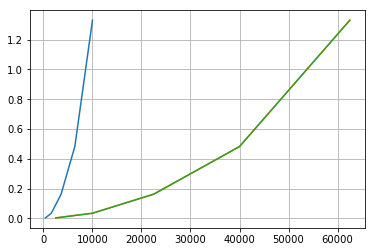

In [67]:
import matplotlib.pyplot as plt
import numpy as np
b = 5
t = np.ones(b)
s = np.ones(b)

plt.grid(True)


for x in range(b):
    n = 20*(x+1)
    t[x] = n*n
    size = [n,n]
    s[x] = timeit.timeit('count_island3(gene_maps(size))',\
                      setup="from __main__ import gene_maps,count_island3,size",\
                      number=1)
plt.plot(t, s)

for x in range(b):
    n = 50*(x+1)
    t[x] = n*n
    size = [n,n]
    p = problem()
    timeit.timeit('p.count_island4(gene_maps(size).tolist())',\
                 setup='from __main__ import gene_maps,p,size',\
                 number=1)
plt.plot(t, s)

for x in range(b):
    n = 50*(x+1)
    t[x] = n*n
    size = [n,n]
    p = problem()
    timeit.timeit('p.numIslands(gene_maps(size).tolist())',\
                 setup='from __main__ import gene_maps,p,size',\
                 number=1)
plt.plot(t, s)

plt.show()

In [63]:
n = 1000
size = [n,n]
p = problem()
timeit.timeit('p.numIslands(gene_maps(size).tolist())',\
                 setup='from __main__ import gene_maps,p,size',\
                 number=1)

2.013841152191162

In [56]:
class problem(object):
    
    def count_island4(self,maps):
        if not maps: return 0
        
        count = 0
        for x in range(len(maps)):
            for y in range(len(maps[0])):
                if maps[x][y] == 1:
                    self.dfs(maps,x,y)
                    count += 1
        return count
    def dfs(self,maps,x,y):
        if x<0 or y<0 or x>=len(maps) or y>=len(maps[0]) or maps[x][y] != 1:
            return
        maps[x][y] = 0
        self.dfs(maps,x+1,y)
        self.dfs(maps,x-1,y)
        self.dfs(maps,x,y+1)
        self.dfs(maps,x,y-1)
    def numIslands(self, maps):
        grid = maps
        def sink(i, j):
            if 0 <= i < len(grid) and 0 <= j < len(grid[i]) and grid[i][j] == 1:
                grid[i][j] = 0
                map(sink, (i+1, i-1, i, i), (j, j, j+1, j-1))
                return 1
            return 0
        return sum(sink(i, j) for i in range(len(grid)) for j in range(len(grid[i])))
    
    
    
class problem1(object):    
    def numIslands(self, maps):
        if not maps:
            return 0
            
        count = 0
        for i in range(len(maps)):
            for j in range(len(maps[0])):
                if maps[i][j] == 1:
                    self.dfs(maps, i, j)
                    count += 1
        return count

    def dfs(self, maps, i, j):
        if i<0 or j<0 or i>=len(maps) or j>=len(maps[0]) or maps[i][j] != 1:
            return
        maps[i][j] = 0
        self.dfs(maps, i+1, j)
        self.dfs(maps, i-1, j)
        self.dfs(maps, i, j+1)
        self.dfs(maps, i, j-1)


                    

In [57]:
size = [3,3]
maps = gene_maps(size,0)
maps = maps.tolist()
p = problem()
p.count_island4(maps)
#p.numIslands(maps)

4

In [58]:
maps[1][1] = '2'
